# CAPSTONE PROJECT - PART 1A
__Michael Gat__  
__General Assembly Santa Monica, Data Science Immersive, Summer 2016__

In this notebook, we'll do a bit more data exploration and chart some of the key indicators. This notebook does not produce any output needed in subsequent investigation, but the results will inform later activities.

In [1]:
# IMPORT LIBRARIES ############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## READ IN DATA
We have a clean dataset from __Part 1__. We'll import that, then select only the columns we want to deal with at this time.

In [2]:
df = pd.read_csv('diabetic_data_clean.csv')

In [3]:
df.shape

(101766, 62)

In [4]:
for i in range(len(df.columns)):
    print df.columns[i]

race
gender
admission_type_id
discharge_disposition_id
admission_source_id
time_in_hospital
num_lab_procedures
num_procedures
num_medications
number_outpatient
number_emergency
number_inpatient
number_diagnoses
max_glu_serum
A1Cresult
metformin
repaglinide
nateglinide
chlorpropamide
glimepiride
acetohexamide
glipizide
glyburide
tolbutamide
pioglitazone
rosiglitazone
acarbose
miglitol
troglitazone
tolazamide
examide
citoglipton
insulin
glyburide-metformin
glipizide-metformin
glimepiride-pioglitazone
metformin-rosiglitazone
metformin-pioglitazone
change
diabetesMed
age_group
readmit
428
276
414
401
427
599
496
403
486
786
780
491
410
682
584
585
707
518
411
285


## CHART KEY FEATURES
A number of the features in the dataset are rather sparsely populated, while others have near complete coverage. We'll get a better look at some of the more common ones.

The description of all variables in the dataset and their meanings are available at: [http://www.hindawi.com/journals/bmri/2014/781670/tab1/](http://www.hindawi.com/journals/bmri/2014/781670/tab1/), a handful of codes not explicitly stated in that document are in 'IDs_mapping.csv' in this directory.

Note that for the purpose of processing, some of the data may have been simplified or rearranged in __Part 1__.

### Target (Readmits)

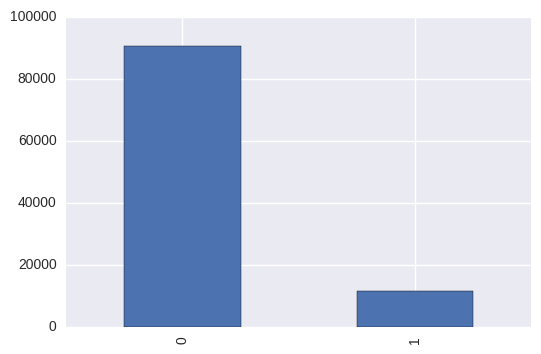

In [5]:
df['readmit'].value_counts().plot(kind='bar')

In [6]:
df['readmit'].value_counts()

0    90409
1    11357
Name: readmit, dtype: int64

### Gender

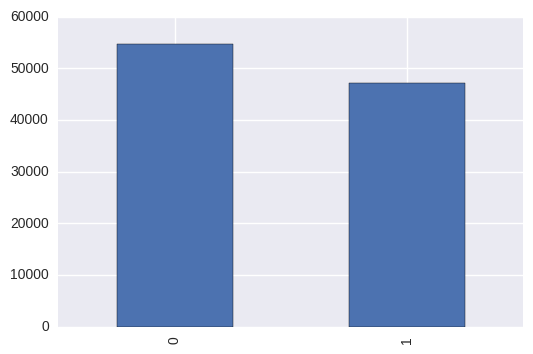

In [7]:
# 0 == Female, 1 == Male
df['gender'].value_counts().plot(kind='bar')

### Days in the hospital

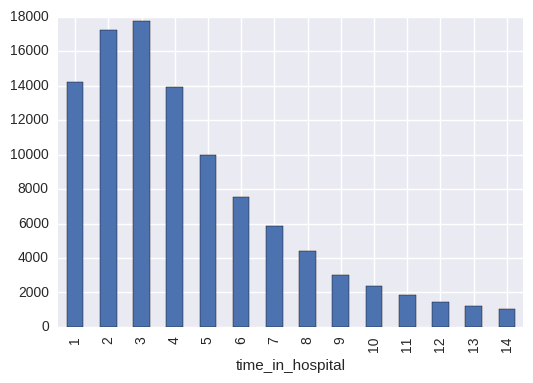

In [8]:
df['time_in_hospital'].groupby(df['time_in_hospital']).count()[:20].plot(kind='bar')

### Age Group

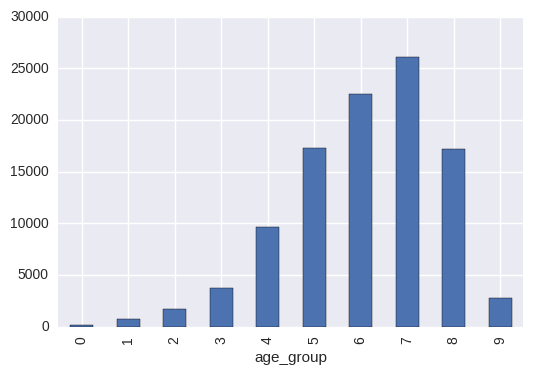

In [9]:
# Age group. 0 = 1-9, 1 = 10-19, etc.
df['age_group'].groupby(df['age_group']).count()[:20].plot(kind='bar')

### A1C Result
As defined for this project, it means that A1C was measured and was elevated. "0" includes those where no measurement was taken, or a measurement was taken and was in the normal range.

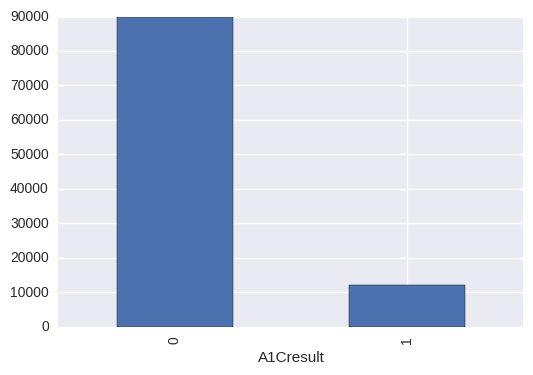

In [10]:
df['A1Cresult'].groupby(df['A1Cresult']).count()[:20].plot(kind='bar')

### Diabetes med prescribed
Was any diabetes medication prescribed during the hospital stay. 1 == Yes.

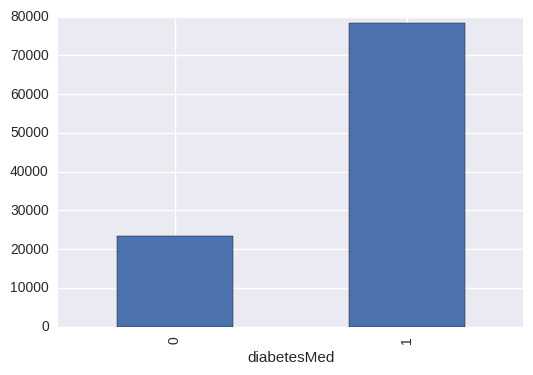

In [11]:
df['diabetesMed'].groupby(df['diabetesMed']).count()[:20].plot(kind='bar')

### Change in diabetes medication
Was there a change in the diabetes medication prescribed during the hospital stay. 1 == Yes.

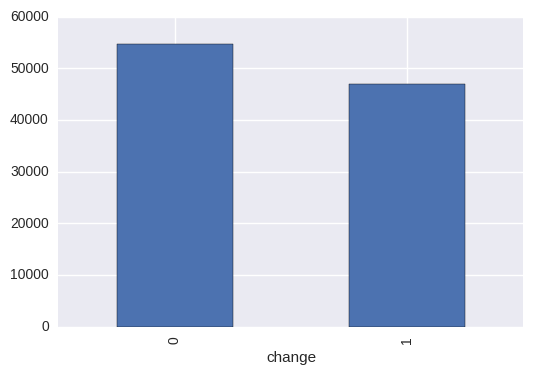

In [12]:
df['change'].groupby(df['change']).count()[:20].plot(kind='bar')

### Admission Type ID
1	Emergency  
2	Urgent  
3	Elective  
4	Newborn  
5	Not Available  
6	NULL  
7	Trauma Center  
8	Not Mapped

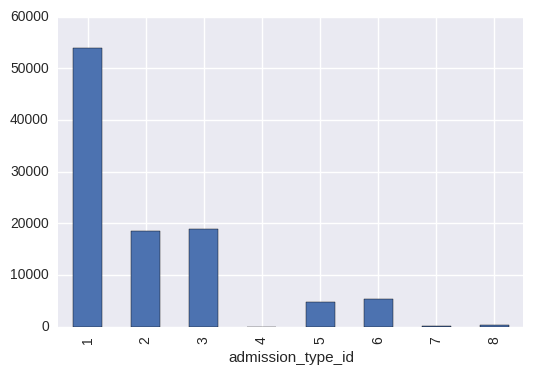

In [13]:
df['admission_type_id'].groupby(df['admission_type_id']).count()[:20].plot(kind='bar')

### Discharge Disposition ID
1	Discharged to home  
2	Discharged/transferred to another short term hospital  
3	Discharged/transferred to SNF  
4	Discharged/transferred to ICF  
5	Discharged/transferred to another type of inpatient care institution  
6	Discharged/transferred to home with home health service  
7	Left AMA  
8	Discharged/transferred to home under care of Home IV provider  
9	Admitted as an inpatient to this hospital  
10	Neonate discharged to another hospital for neonatal aftercare  
11	Expired  
12	Still patient or expected to return for outpatient services  
13	Hospice / home  
14	Hospice / medical facility  
15	Discharged/transferred within this institution to Medicare approved swing bed  
16	Discharged/transferred/referred another institution for outpatient services  
17	Discharged/transferred/referred to this institution for outpatient services  
18	NULL  
19	Expired at home. Medicaid only, hospice.  
20	Expired in a medical facility. Medicaid only, hospice.  
21	Expired, place unknown. Medicaid only, hospice.  
22	Discharged/transferred to another rehab fac including rehab units of a hospital.  
23	Discharged/transferred to a long term care hospital.  
24	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.  
25	Not Mapped  
26	Unknown/Invalid  
30	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere  
27	Discharged/transferred to a federal health care facility.  
28	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital  
29	Discharged/transferred to a Critical Access Hospital (CAH).  

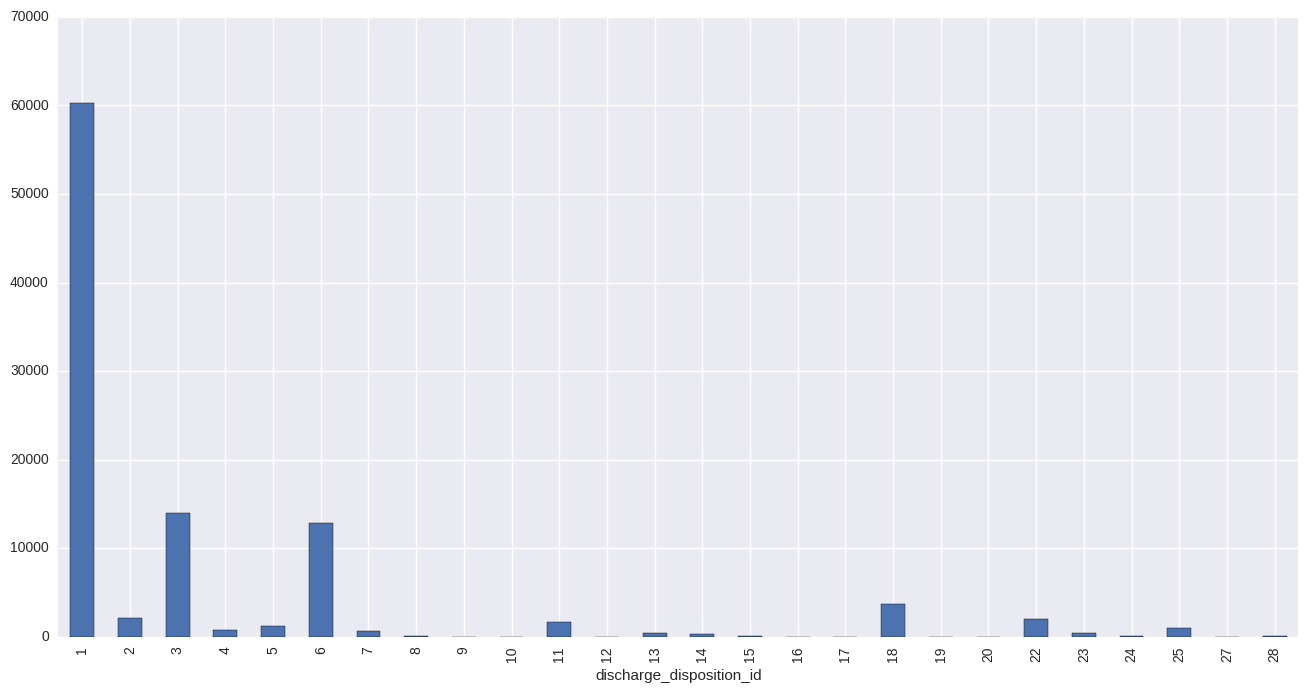

In [14]:
plt.figure(figsize=(16,8))
df['discharge_disposition_id'].groupby(df['discharge_disposition_id']).count()[:50].plot(kind='bar')

### Number of lab procedures
Number of lab tests performed during the stay.
Should be noted that lab tests performed will reflect differences between standard procedures at different facilities, as well as changes in standards over time, as the data was collected over the course of a decade.

For example, at a high-end facility in a "good" neighborhood, drawing blood and running a baseline battery of tests every single day is considered routine. In other places and at other times, this would not have been the case.

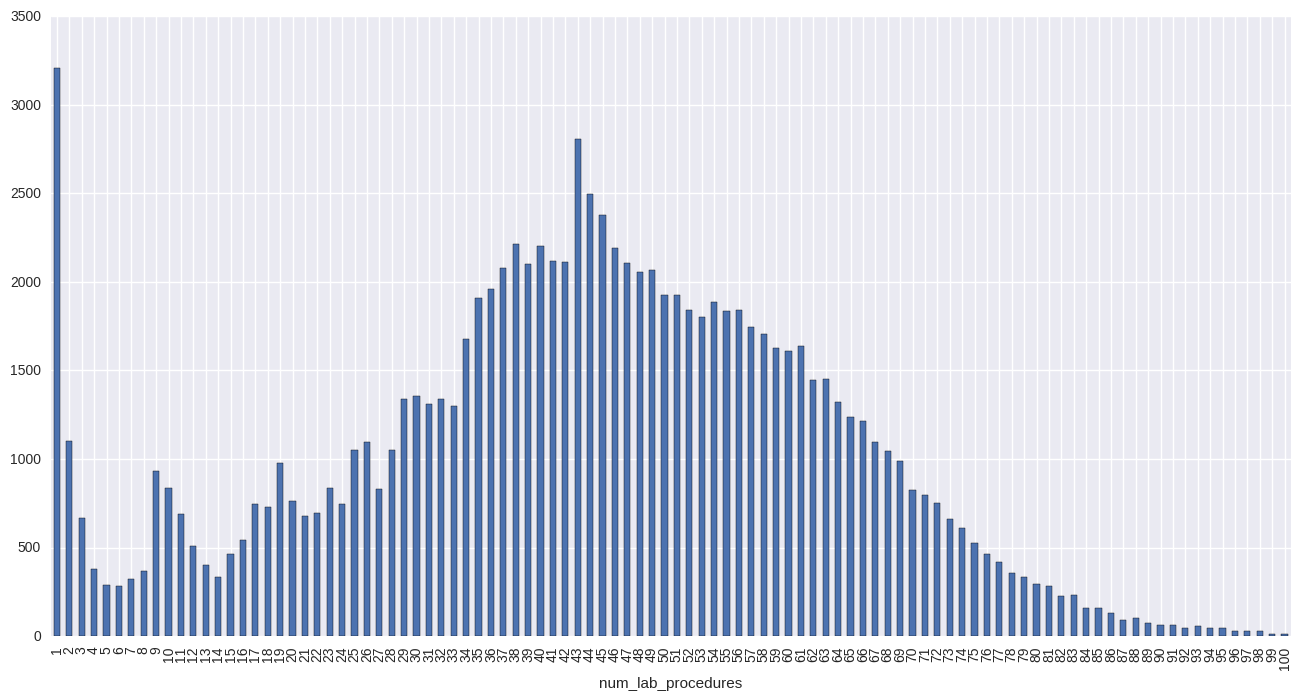

In [15]:
plt.figure(figsize=(16,8))
df['num_lab_procedures'].groupby(df['num_lab_procedures']).count()[:100].plot(kind='bar')

### Number of medical procedures performed during the stay

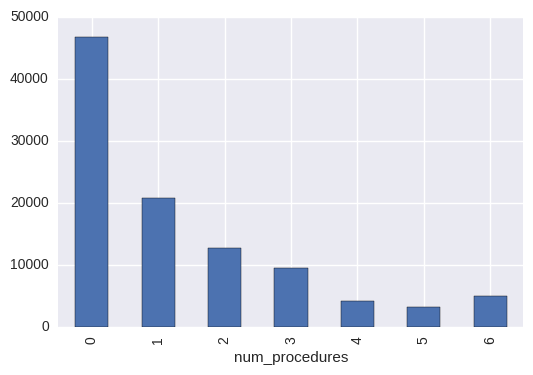

In [16]:
df['num_procedures'].groupby(df['num_procedures']).count()[:20].plot(kind='bar')

### Number of idividual doses of medications administered during stay
A dose is a single medication (not necessarily a single pill) administered at a specific time. So a medication administered once a day will count as 1 for that day, and 3 for a 3-day stay. A medication administered three times a day will count 3 per day, or 9 for a 3-day stay. This is regardless of the number of pills or other units. (For ex, a single dose might consist of two pills taken together.)

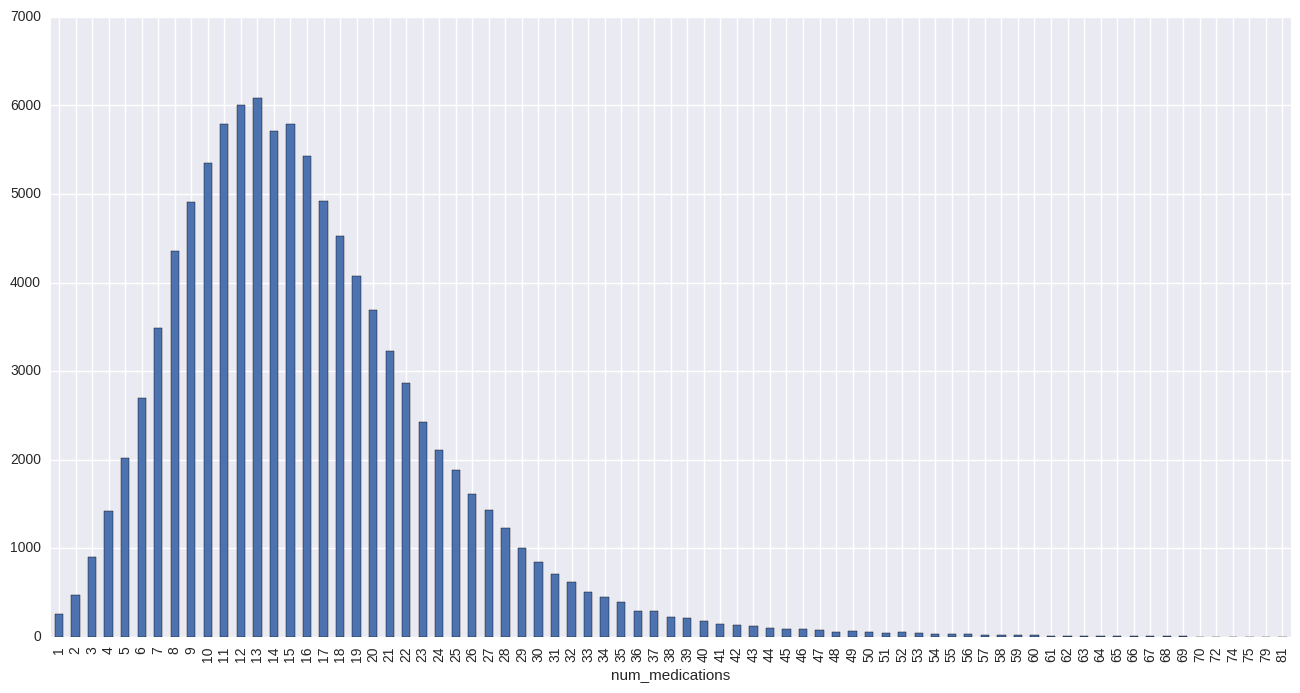

In [17]:
plt.figure(figsize=(16,8))
df['num_medications'].groupby(df['num_medications']).count().plot(kind='bar')

### Number of outpatient visits in the prior year

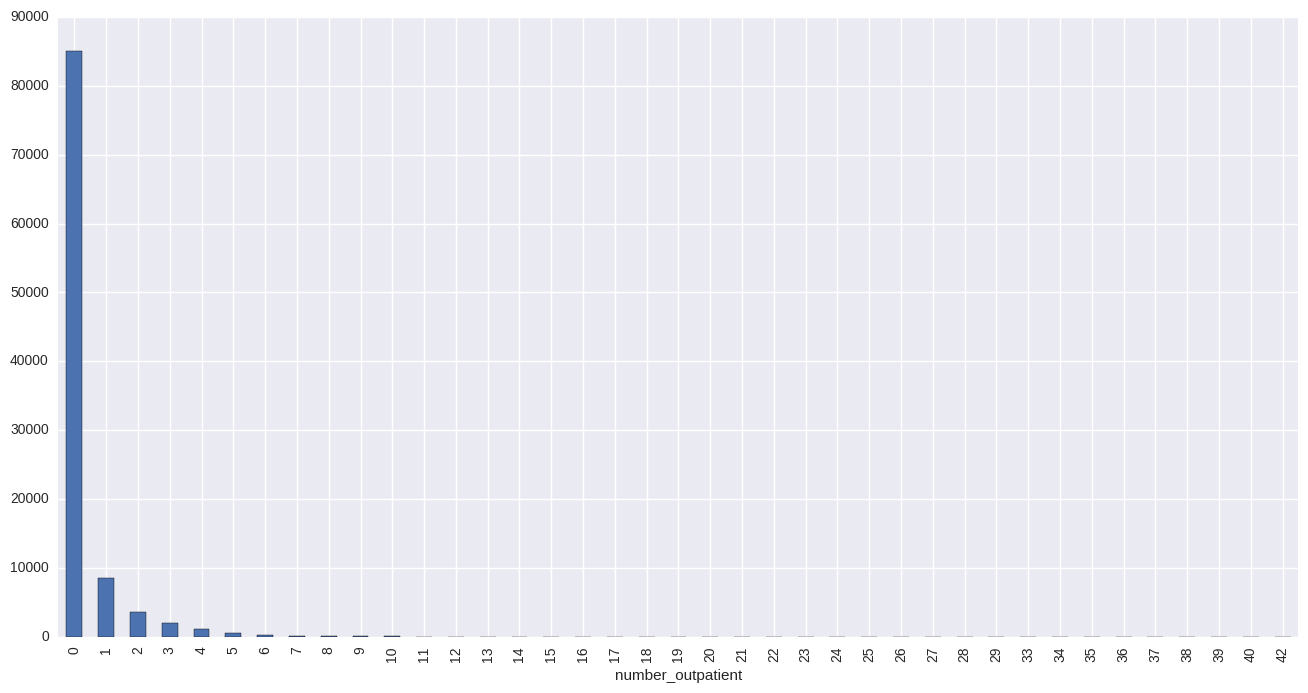

In [18]:
plt.figure(figsize=(16,8))
df['number_outpatient'].groupby(df['number_outpatient']).count().plot(kind='bar')

### Number of emergency visits in the prior year

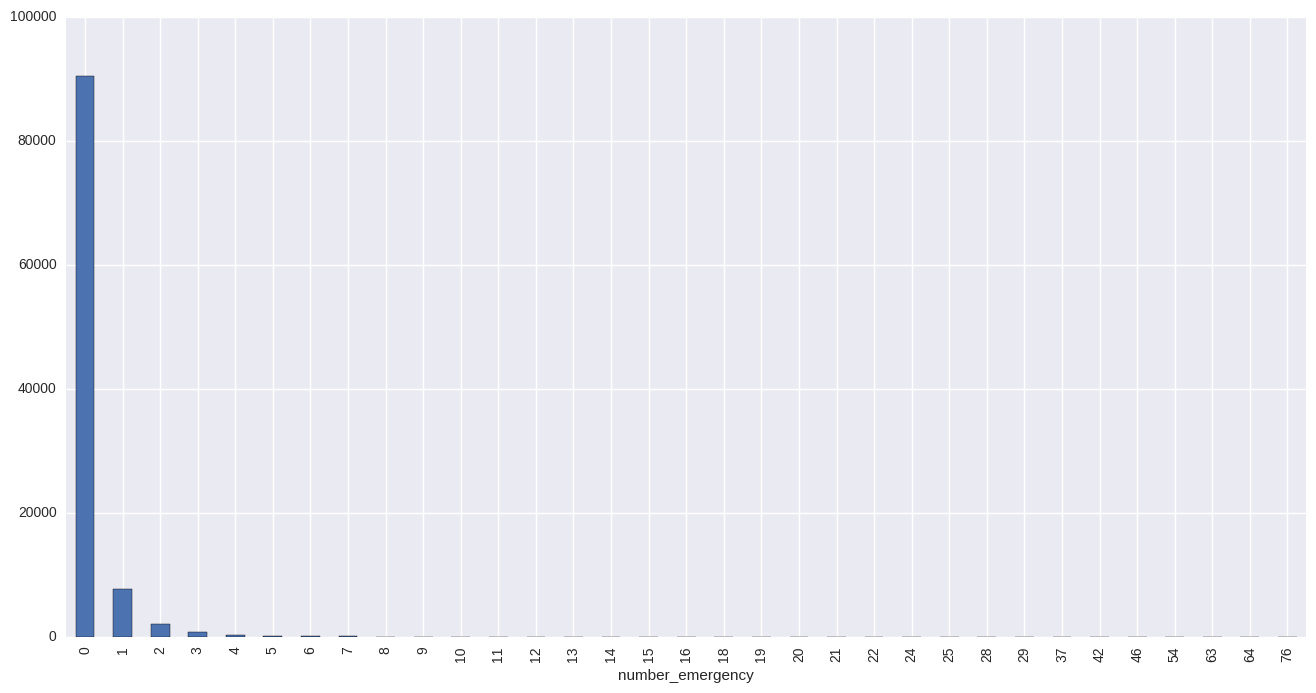

In [19]:
plt.figure(figsize=(16,8))
df['number_emergency'].groupby(df['number_emergency']).count().plot(kind='bar')

### Number of inpatient visits in the prior year

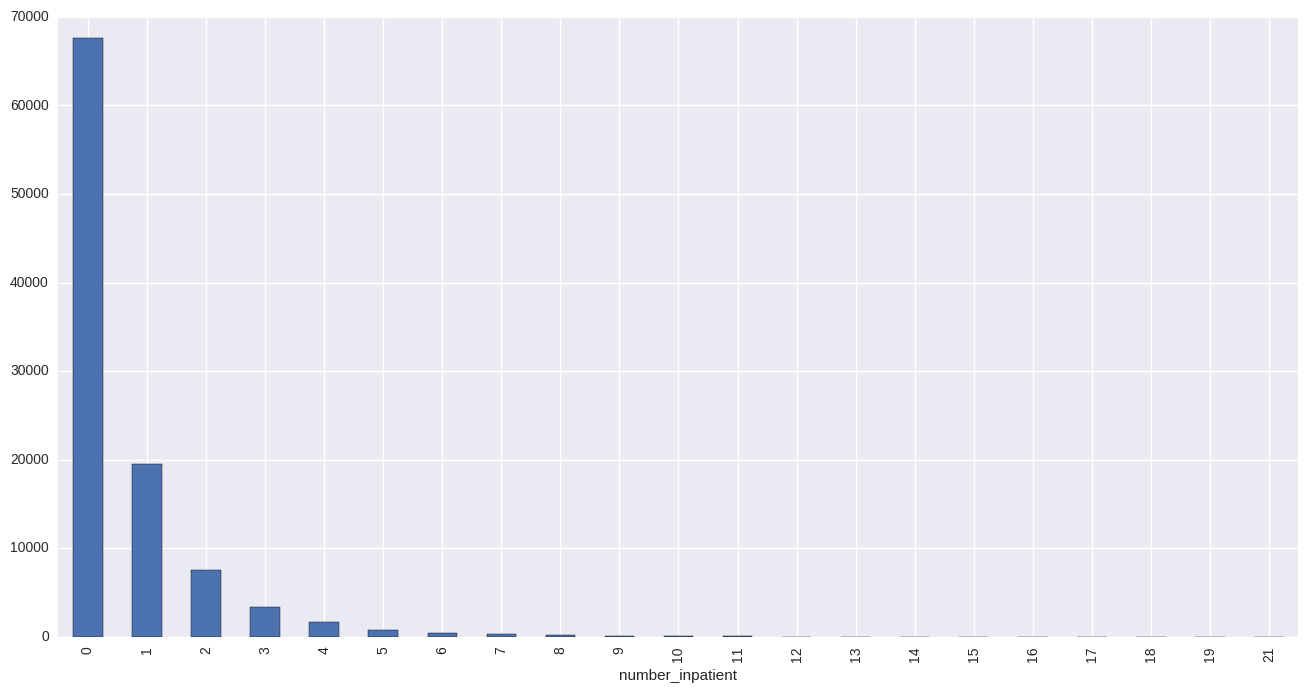

In [20]:
plt.figure(figsize=(16,8))
df['number_inpatient'].groupby(df['number_inpatient']).count().plot(kind='bar')

### Number of individual diagnosis codes
Worth noting that we only have access to the first three, though most patients had more than three. To some degree this reflects the fact that many common Electronic Medical Record system allow for nice values, and clinical staff are reluctant not to capture everything possible.

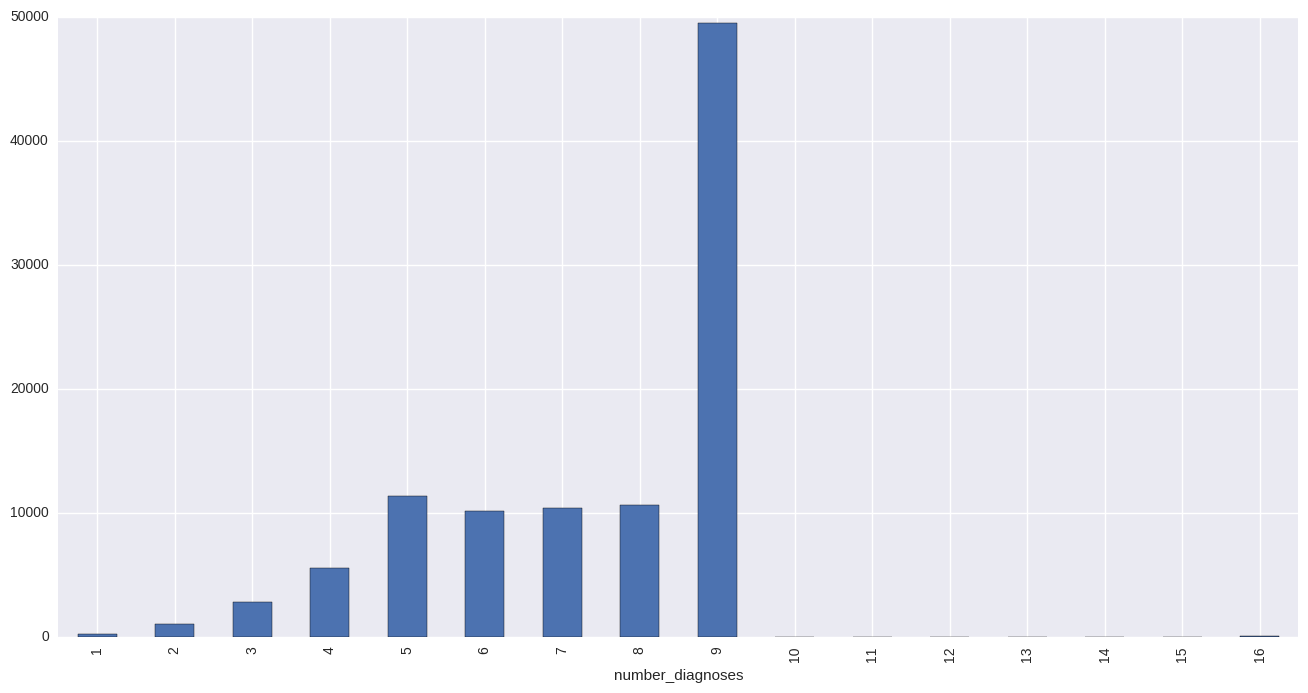

In [21]:
plt.figure(figsize=(16,8))
df['number_diagnoses'].groupby(df['number_diagnoses']).count()[:20].plot(kind='bar')

### Glucose Serum Result
1 if tested and elevated  
0 if not tested or if tested and normal

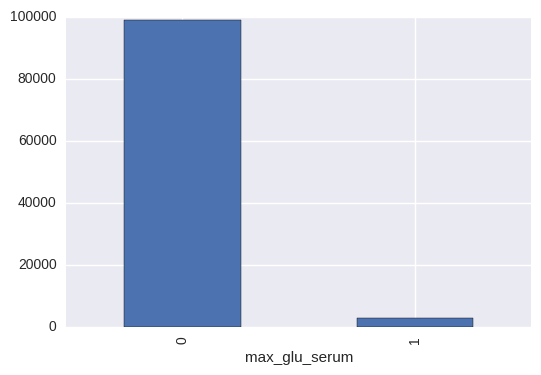

In [22]:
df['max_glu_serum'].groupby(df['max_glu_serum']).count()[:20].plot(kind='bar')